In [43]:
import pandas as pd 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [44]:
data=pd.read_csv("homeprices_multivariate.csv")
data

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [45]:
median=math.floor(data.bedrooms.median())

In [46]:
data.bedrooms=data.bedrooms.fillna(median)
data

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [47]:
reg=LinearRegression()
reg.fit(data[['area','bedrooms','age']],data.price)

LinearRegression()

In [48]:
reg.predict([[3300,4,15]])

c:\Users\nirob\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([636208.81195671])

In [49]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [50]:
reg.intercept_

221323.0018654043

In [51]:
# y=m1*area+m2*bedrooms+m3*age

112.06244194*3300+23388.88007794*4+(-3231.71790863)*15+221323.0018654043

636208.8119497143

In [52]:
#accuracy
reg.score(data[['area','bedrooms','age']],data.price)

0.9550196399325819

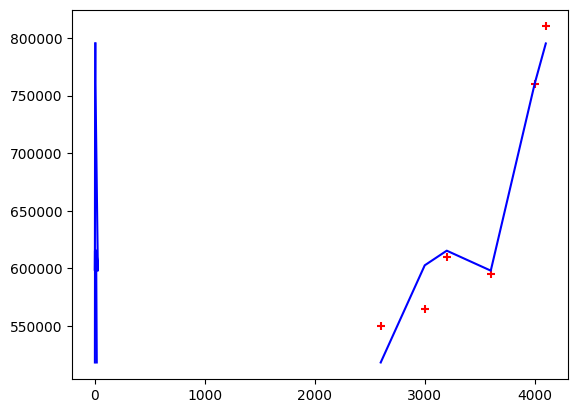

In [53]:
plt.scatter(data[['area']],data.price,marker="+",color="red")
plt.plot(data[['area','bedrooms','age']],reg.predict(data[['area','bedrooms','age']]),color="blue")